In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
#Check Missing Values
df.isnull().sum()


,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [5]:
df = df.dropna(subset=['name', 'host_name', 'last_review'])


In [6]:
#Check Missing Values
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
df['id'].isnull().sum()

np.int64(0)

In [9]:
df['id'].duplicated().sum()

np.int64(0)

In [10]:
df['name'].isnull().sum()

np.int64(0)

In [11]:
(df['name'].str.strip() == "").sum()

np.int64(0)

In [12]:
(df['name'].str.len() < 3).sum()

np.int64(11)

In [13]:
df = df[df['name'].str.len() >= 3]

In [14]:
df['name'].sample(10)

,name
3238,Penthouse studio w/ skylights and skyline views
4974,Beautiful Loft in Union Square
48222,"Beautiful, Spacious room in prime Williamsburg!"
1282,Historic sundrenched apt of the Lower East Side
3397,Cute East Village 1 Bedroom Apt
13371,Small but warm and cozy. (^_^) Female Only Ple...
892,Chelsea/Meat Packing Artist Space!
8619,Spacious 2 Bedroom + Backyard in Fort Greene BK
45746,New Apartment in Manhattan - New York City
30010,NEW Luxury 1BR Oasis - Most Desirable NYC Loca...


In [15]:
(df['name'].str.len() < 3).sum()

np.int64(0)

In [16]:
df['host_id'].isnull().sum()

np.int64(0)

In [17]:
df['host_id'].duplicated().sum()

np.int64(8584)

In [18]:
df['neighbourhood_group'].isnull().sum()

np.int64(0)

In [19]:
df['neighbourhood_group'].unique()
df['neighbourhood_group'].nunique()

5

In [20]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [21]:
(df['neighbourhood_group'].str.strip() == "").sum()

np.int64(0)

In [22]:
df['neighbourhood'].isnull().sum()

np.int64(0)

In [23]:
(df['neighbourhood'].str.strip() == "").sum()

np.int64(0)

In [24]:
df['neighbourhood'].sample(10)

,neighbourhood
45235,Borough Park
45493,Washington Heights
1841,East Village
14548,Upper West Side
6319,Upper East Side
25924,Crown Heights
26392,Hell's Kitchen
46864,Jackson Heights
20522,Sheepshead Bay
1797,Elmhurst


In [25]:
df['latitude'].isnull().sum()

np.int64(0)

In [26]:
df['latitude'].dtype

dtype('float64')

In [27]:
df[(df['latitude'] < 40.49) | (df['latitude'] > 40.92)].shape

(0, 16)

In [28]:
(df['latitude'] == 0).sum()

np.int64(0)

In [29]:
df['longitude'].isnull().sum()

np.int64(0)

In [30]:
df['longitude'].dtype

dtype('float64')

In [31]:
df[(df['longitude'] < -74.26) | (df['longitude'] > -73.70)].shape

(0, 16)

In [32]:
(df['longitude'] == 0).sum()

np.int64(0)

In [33]:
df['room_type'].isnull().sum()

np.int64(0)

In [34]:
(df['room_type'].str.strip() == "").sum()

np.int64(0)

In [35]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [36]:
df['price'].isnull().sum()

np.int64(0)

In [37]:
df['price'].dtype

dtype('int64')

In [38]:
(df['price'] <= 0).sum()

np.int64(10)

In [39]:
df = df[df['price'] > 0]

In [40]:
(df['price'] <= 0).sum()

np.int64(0)

In [41]:
df['minimum_nights'].isnull().sum()

np.int64(0)

In [42]:
df['minimum_nights'].dtype

dtype('int64')

In [43]:
(df['minimum_nights'] <= 0).sum()

np.int64(0)

In [44]:
df['number_of_reviews'].isnull().sum()

np.int64(0)

In [45]:
df['number_of_reviews'].dtype

dtype('int64')

In [46]:
(df['number_of_reviews'] < 0).sum()

np.int64(0)

In [47]:
df['last_review'].isnull().sum()

np.int64(0)

In [48]:
df['last_review'].dtype

dtype('O')

In [49]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [50]:
df['last_review'].isnull().sum()

np.int64(0)

In [51]:
df[df['last_review'] > pd.Timestamp.today()].shape

(0, 16)

In [52]:
df['reviews_per_month'].isnull().sum()

np.int64(0)

In [53]:
df['reviews_per_month'].dtype

dtype('float64')

In [54]:
(df['reviews_per_month'] < 0).sum()

np.int64(0)

In [55]:
df['calculated_host_listings_count'].isnull().sum()

np.int64(0)

In [56]:
df['calculated_host_listings_count'].dtype

dtype('int64')

In [57]:
(df['calculated_host_listings_count'] < 0).sum()

np.int64(0)

In [58]:
df['availability_365'].isnull().sum()

np.int64(0)

In [59]:
df['availability_365'].dtype

dtype('int64')

In [60]:
df[(df['availability_365'] < 0) | (df['availability_365'] > 365)].shape

(0, 16)

In [61]:
df.to_csv("AB_NYC_2019_Cleaned.csv", index=False)


Krushi

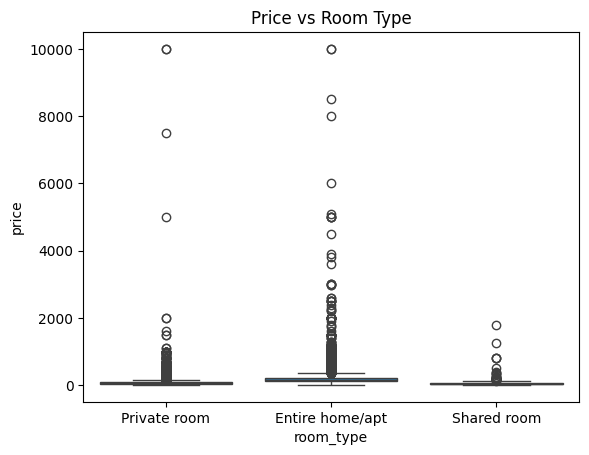

In [62]:
# EDA - 1 Price vs room_type
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Price vs Room Type")
plt.show()

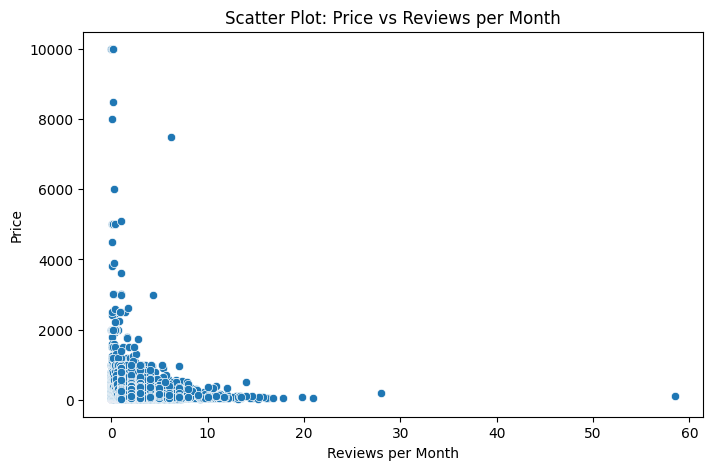

In [63]:
# EDA - 2 Relationship between Price and Reviews per Month
plt.figure(figsize=(8,5))
sns.scatterplot(x='reviews_per_month', y='price', data=df)
plt.title("Scatter Plot: Price vs Reviews per Month")
plt.xlabel("Reviews per Month")
plt.ylabel("Price")
plt.show()

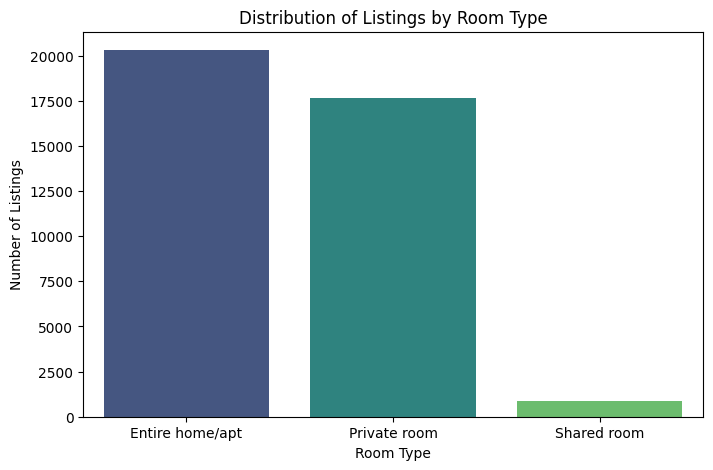

In [64]:
# EDA - 3 Distribution of Listings by Room Type
top_rooms = df['room_type'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(
    x=top_rooms.index,
    y=top_rooms.values,
    hue=top_rooms.index,      # required for palette
    palette='viridis',
    legend=False              # remove unnecessary legend
)
plt.title("Distribution of Listings by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()

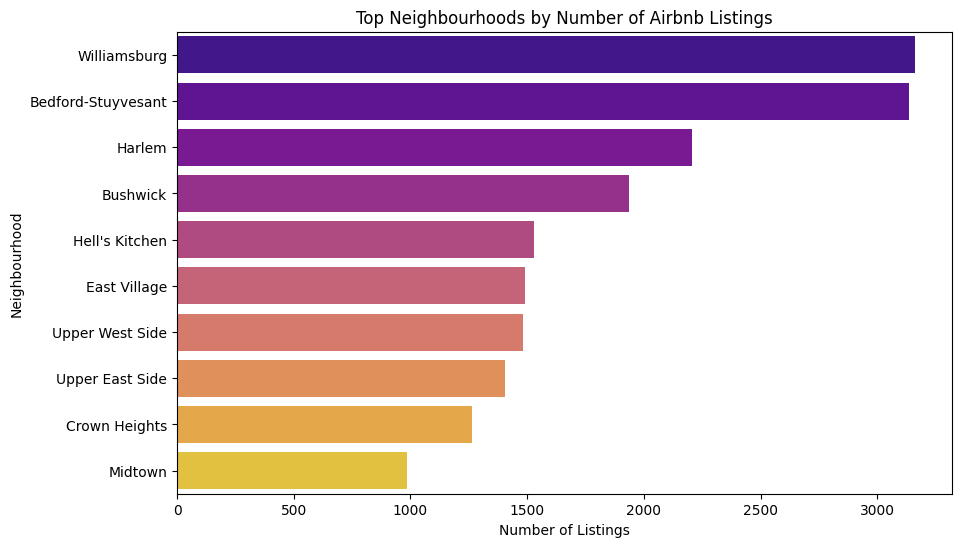

In [65]:
# EDA 4 - Top Neighbourhoods by Listing Count
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_neighbourhoods.values,
    y=top_neighbourhoods.index,
    hue=top_neighbourhoods.index,   # required for palette
    palette='plasma',
    legend=False
)
plt.title("Top Neighbourhoods by Number of Airbnb Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood")
plt.show()

Lakshmi

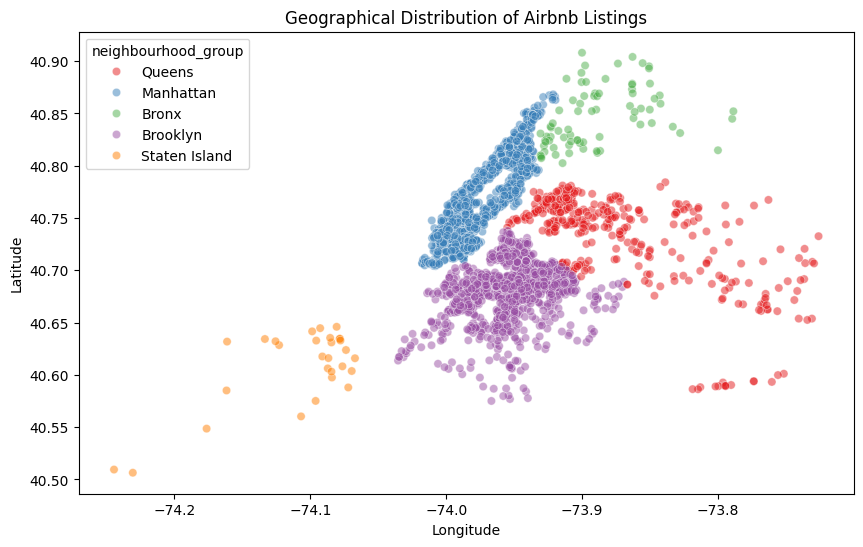

In [66]:
# EDA - 1 Geographical Distribution of Airbnb Listings
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df.sample(3000),
    x="longitude",
    y="latitude",
    hue="neighbourhood_group",
    alpha=0.5,
    palette="Set1"
)
plt.title("Geographical Distribution of Airbnb Listings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

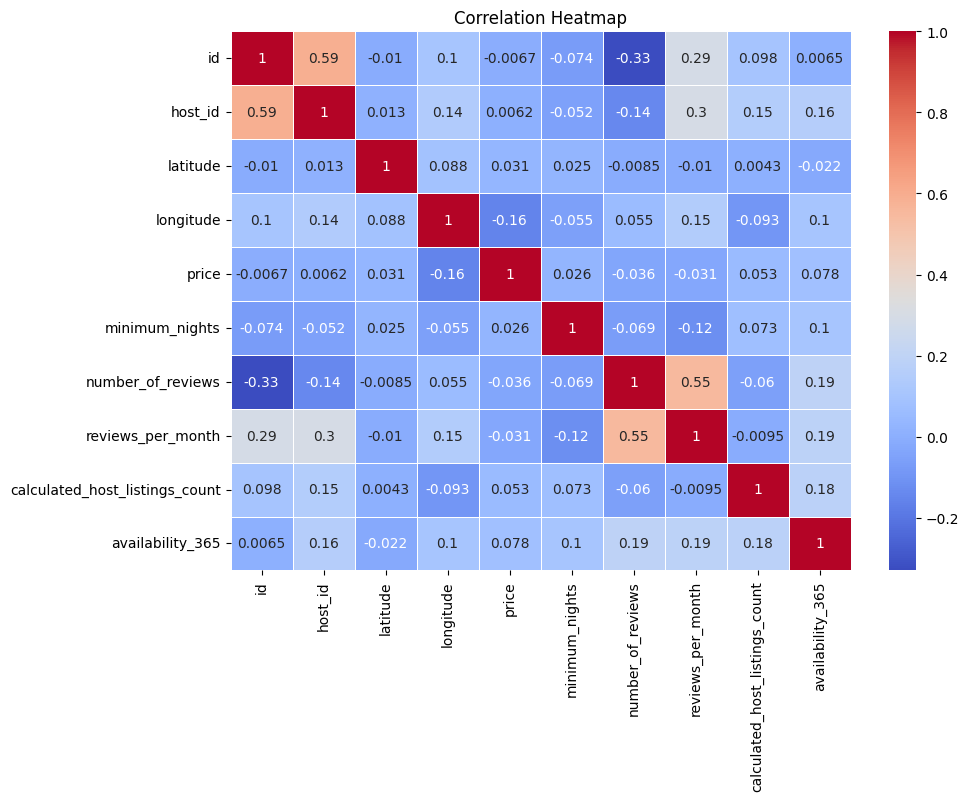

In [67]:
# EDA - 2 Correlation Analysis of Numerical Features
plt.figure(figsize=(10,7))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


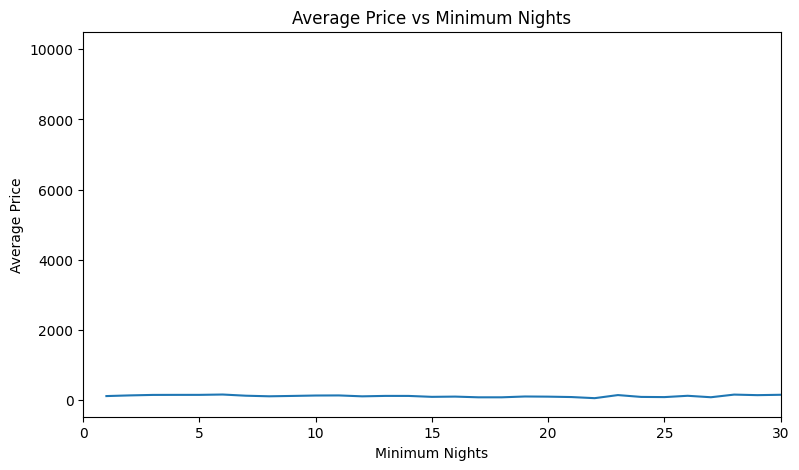

In [68]:
# EDA - 3 Average Price as a Function of Minimum Stay Duration
avg_price = df.groupby('minimum_nights')['price'].mean().reset_index()

plt.figure(figsize=(9,5))
sns.lineplot(data=avg_price, x='minimum_nights', y='price')
plt.title("Average Price vs Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Average Price")
plt.xlim(0, 30)
plt.show()

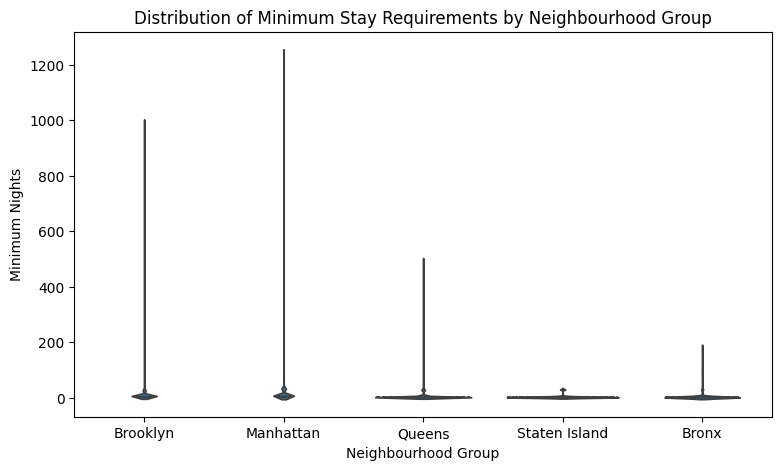

In [69]:
# EDA - 4 Distribution of Minimum Stay Requirements by Neighbourhood Group
plt.figure(figsize=(9,5))
sns.violinplot(x='neighbourhood_group', y='minimum_nights', data=df, inner='quartile')
plt.title("Distribution of Minimum Stay Requirements by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Minimum Nights")
plt.show()

Shridhi

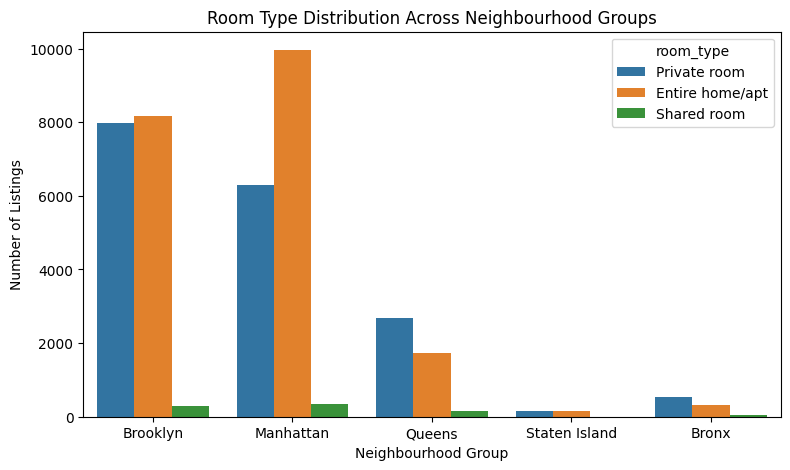

In [70]:
# EDA 1 -  Room Type Distribution Across Neighbourhood Groups
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type')
plt.title("Room Type Distribution Across Neighbourhood Groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.show()

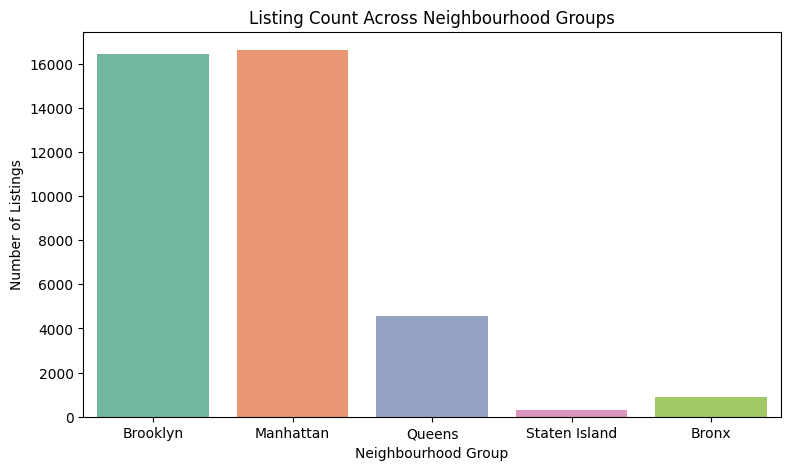

In [71]:
# EDA 2 - Listing Count Across Neighbourhood Groups
plt.figure(figsize=(9,5))
sns.countplot(
    data=df,
    x='neighbourhood_group',
    hue='neighbourhood_group',   # required for palette
    palette='Set2',
    legend=False
)
plt.title("Listing Count Across Neighbourhood Groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.show()

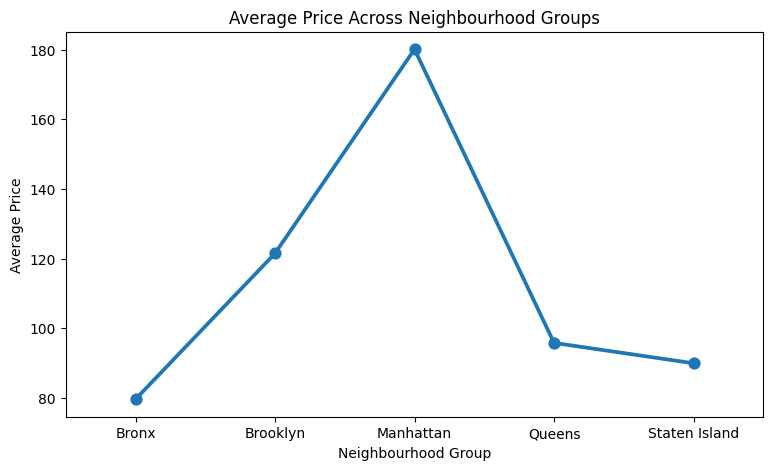

In [72]:
# EDA 3 - Average Price Across Neighbourhood Groups

avg_price_ng = df.groupby('neighbourhood_group')['price'].mean().reset_index()

plt.figure(figsize=(9,5))
sns.pointplot(
    data=avg_price_ng,
    x='neighbourhood_group',
    y='price',
    markers='o',
    linestyles='-'
)
plt.title("Average Price Across Neighbourhood Groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.show()

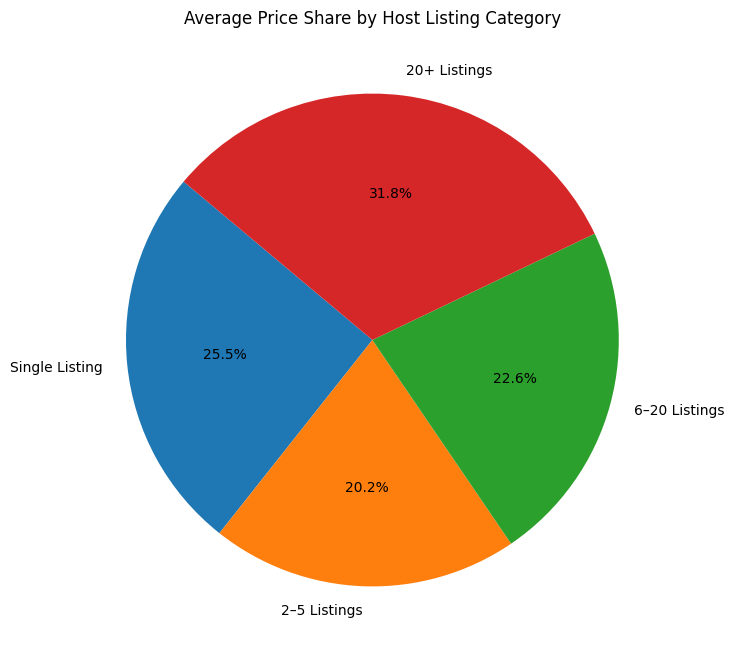

In [73]:
# EDA 4 - Average Price Share by Host Listing Category
df['host_category'] = pd.cut(
    df['calculated_host_listings_count'],
    bins=[0, 1, 5, 20, df['calculated_host_listings_count'].max()],
    labels=['Single Listing', '2–5 Listings', '6–20 Listings', '20+ Listings']
)

# Aggregate average price by host category (FIX WARNING HERE)
price_share = df.groupby('host_category', observed=False)['price'].mean()

plt.figure(figsize=(8,8))
plt.pie(
    price_share,
    labels=price_share.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Average Price Share by Host Listing Category")
plt.show()

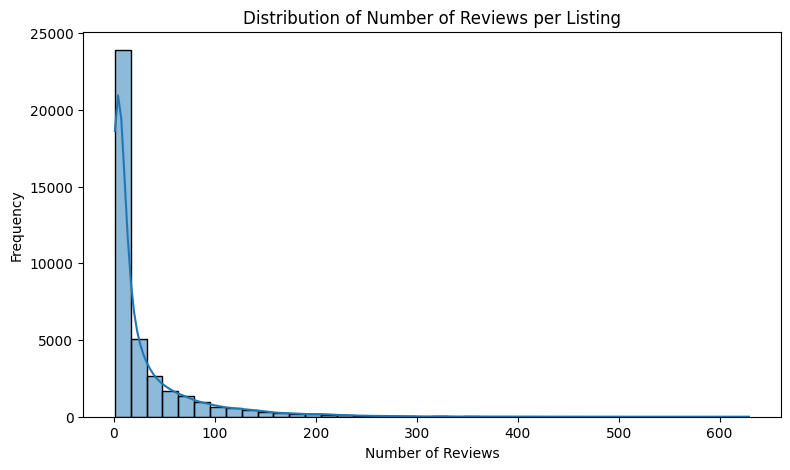

In [74]:
# EDA - 5 Distribution of Number of Reviews per Listing
plt.figure(figsize=(9,5))
sns.histplot(df['number_of_reviews'], bins=40, kde=True)
plt.title("Distribution of Number of Reviews per Listing")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.show()

Ansh

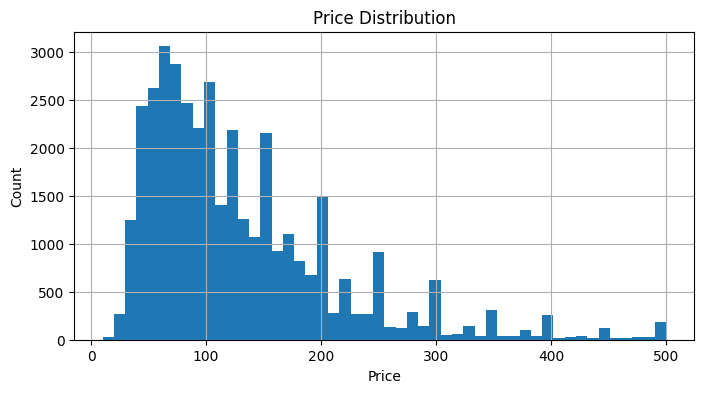

,price
count,38800.000000
mean,142.370335
std,197.014809
min,10.000000
25%,69.000000
50%,101.000000
75%,170.000000
max,10000.000000


In [75]:
# EDA 1 - Distribution of Airbnb Listing Prices
price_series = df["price"].dropna()
plt.figure(figsize=(8,4))
plt.hist(price_series[price_series<=500], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.grid(True)
plt.show()

price_series.describe()

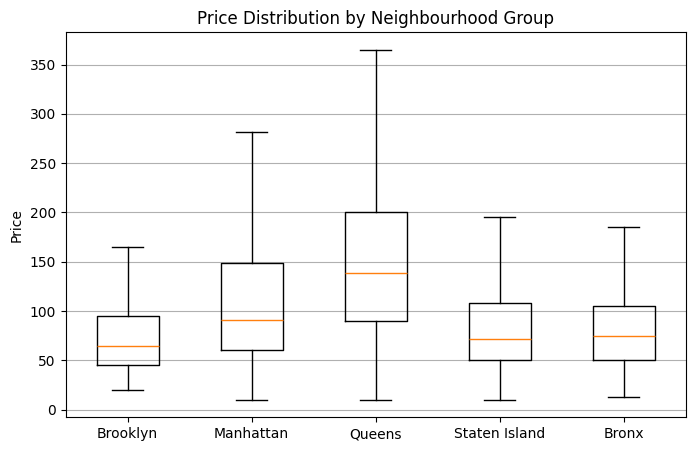

,count,median,mean,std
neighbourhood_group,,,,
Bronx,874,65.0,79.65,63.98
Brooklyn,16428,94.0,121.50,169.87
Manhattan,16615,140.0,180.10,226.51
Queens,4569,72.0,95.82,168.45
Staten Island,314,75.0,89.96,65.86


In [76]:
# EDA 2 - Price Distribution by Neighbourhood Group

df_box = df[df["price"] <= 500].dropna(subset=["price", "neighbourhood_group"])

groups = [g["price"].values for _, g in df_box.groupby("neighbourhood_group")]
labels = list(df_box["neighbourhood_group"].unique())

plt.figure(figsize=(8,5))
plt.boxplot(groups, tick_labels=labels, showfliers=False)
plt.ylabel("Price")
plt.title("Price Distribution by Neighbourhood Group")
plt.grid(axis="y")
plt.show()

df.groupby("neighbourhood_group")["price"].agg(
    ["count", "median", "mean", "std"]
).round(2)

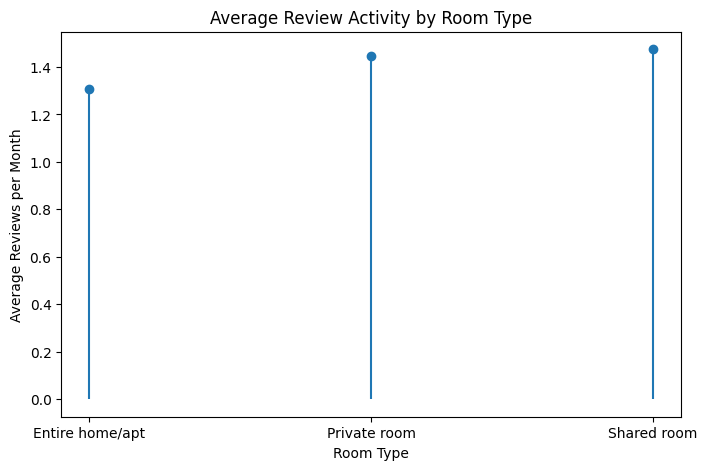

In [77]:
#EDA 3 - Average Reviews per Month by Room Type (Lollipop Chart)
avg_rpm = df.groupby("room_type")["reviews_per_month"].mean().reset_index()

plt.figure(figsize=(8,5))
plt.stem(
    avg_rpm["room_type"],
    avg_rpm["reviews_per_month"],
    basefmt=" "
)
plt.xlabel("Room Type")
plt.ylabel("Average Reviews per Month")
plt.title("Average Review Activity by Room Type")
plt.show()

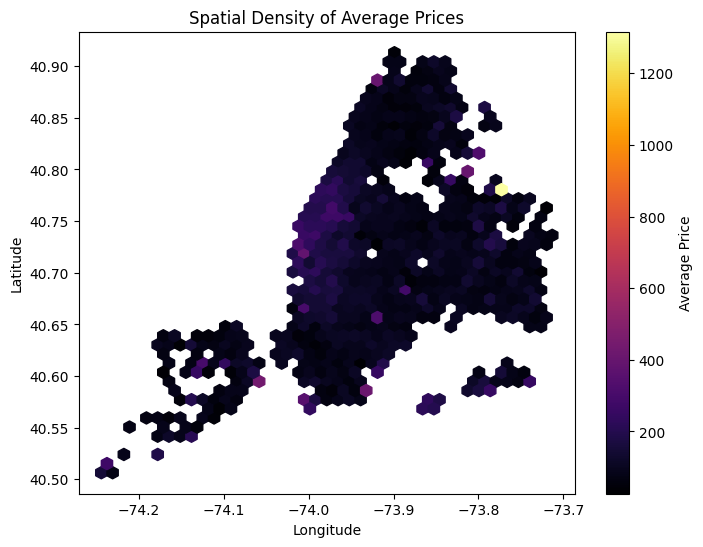

In [78]:
# EDA 4 - Price Density by Location (Hexbin Plot)
plt.figure(figsize=(8,6))
plt.hexbin(
    df['longitude'],
    df['latitude'],
    C=df['price'],
    gridsize=40,
    reduce_C_function=np.mean,
    cmap='inferno'
)
plt.colorbar(label='Average Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Density of Average Prices')
plt.show()

Smit

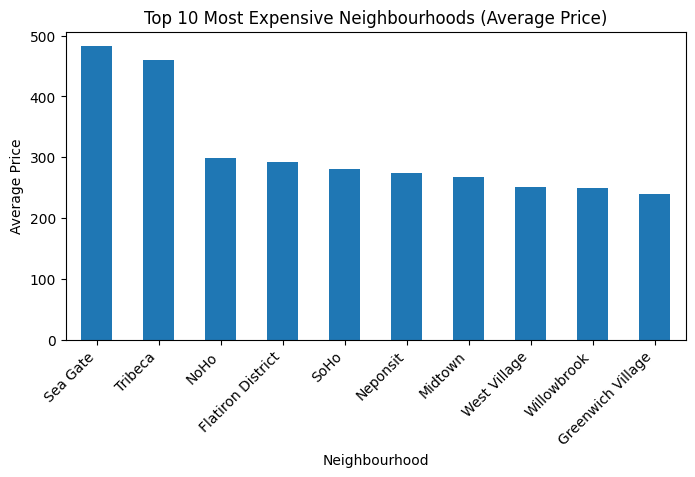

In [79]:
# EDA 1 - Top 10 Most Expensive Neighbourhoods (Average Price
top_neigh = (
    df.groupby('neighbourhood')['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,4))
top_neigh.plot(kind='bar')
plt.title("Top 10 Most Expensive Neighbourhoods (Average Price)")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right')
plt.show()

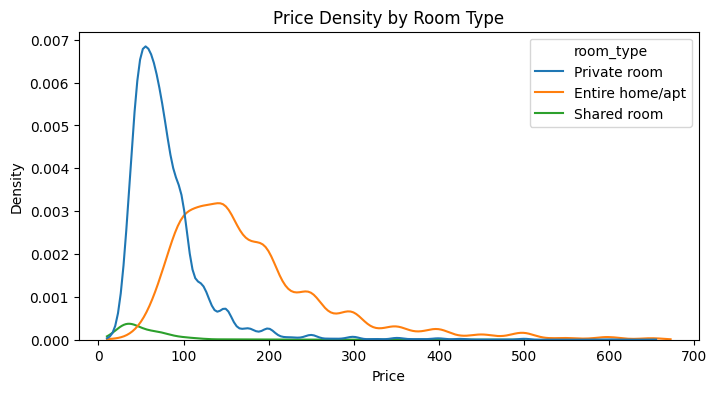

In [80]:
# EDA 2 - Price Density by Room Type
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df = df[df["price"].notna() & (df["price"] > 0)]
# Remove extreme outliers for clearer KDE
upper_cap = df["price"].quantile(0.99)
df_trim = df[df["price"] <= upper_cap]

plt.figure(figsize=(8,4))
sns.kdeplot(
    data=df_trim,
    x="price",
    hue="room_type",
    cut=0
)
plt.title("Price Density by Room Type")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()


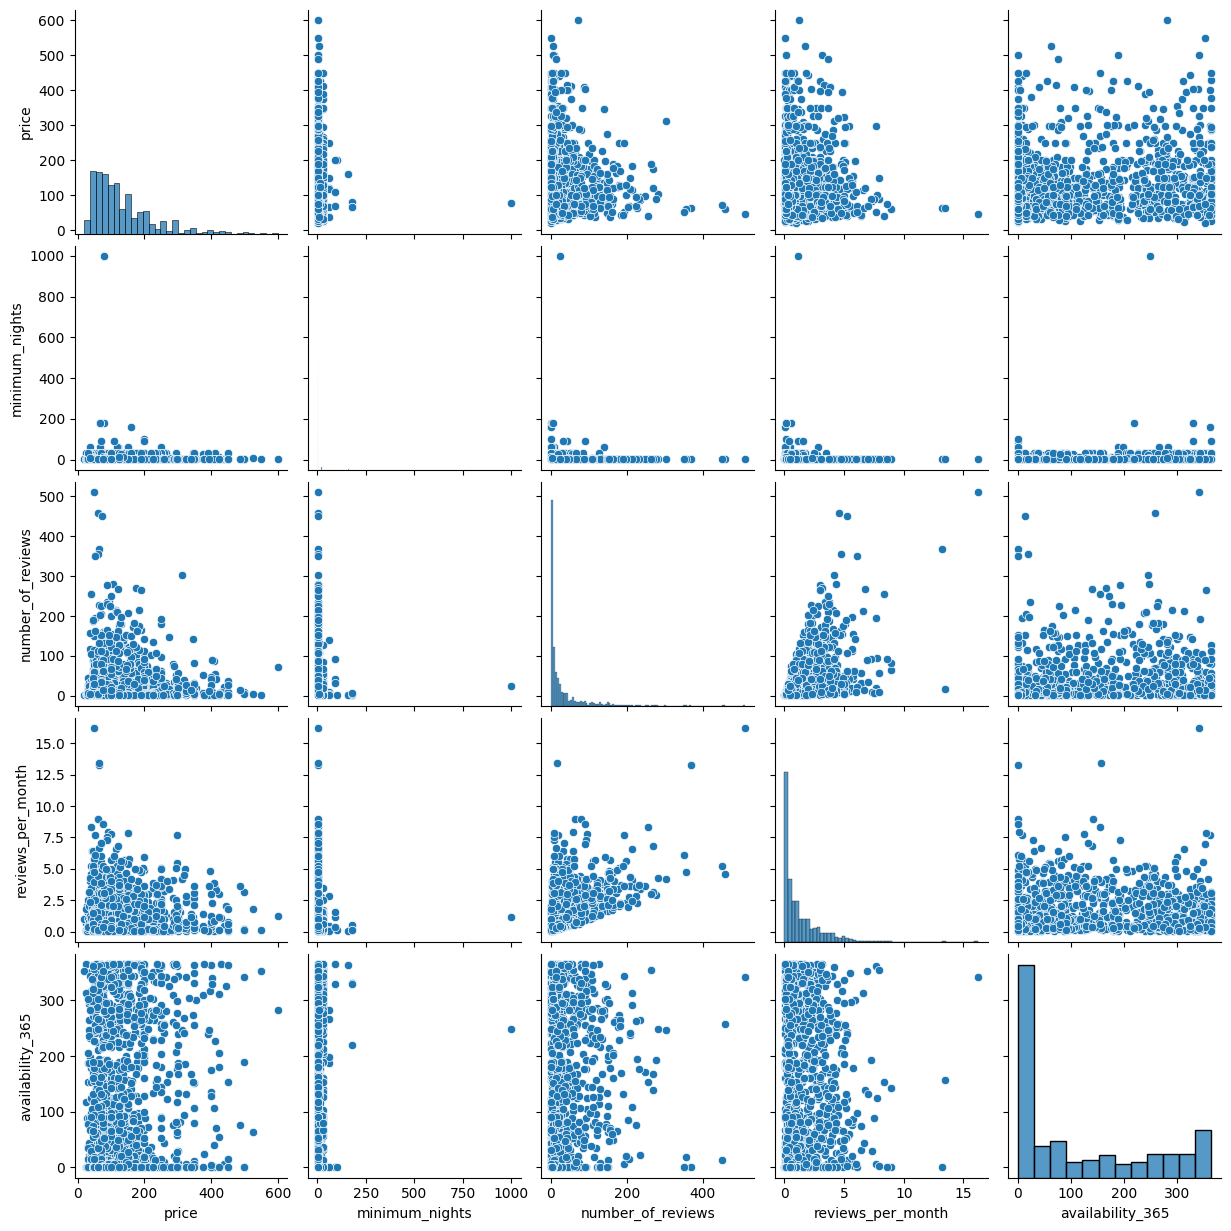

In [81]:
# EDA 3 - Pairplot of Price and Booking-Related Numerical Variables
df_plot = df.copy()
if "price" in df_plot.columns:
    cap = df_plot["price"].quantile(0.99)
    df_plot = df_plot[df_plot["price"] <= cap]

pair_cols = [c for c in ["price","minimum_nights","number_of_reviews","reviews_per_month","availability_365"] if c in df_plot.columns]
if len(pair_cols) >= 3:
    sns.pairplot(df_plot[pair_cols].dropna().sample(min(1500, len(df_plot)), random_state=42))
    plt.show()

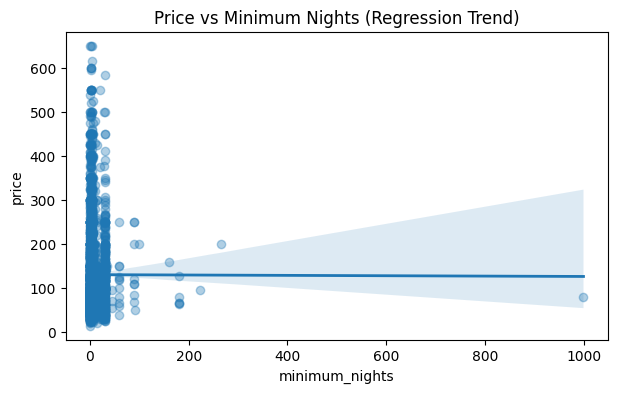

In [82]:
# EDA 4 - Price vs Minimum Nights with Regression Trend
if "minimum_nights" in df_plot.columns and "price" in df_plot.columns:
    sample = df_plot.sample(min(4000, len(df_plot)), random_state=42)
    plt.figure(figsize=(7,4))
    sns.regplot(data=sample, x="minimum_nights", y="price", scatter_kws={"alpha":0.35}, line_kws={"linewidth":2})
    plt.title("Price vs Minimum Nights (Regression Trend)")
    plt.show()

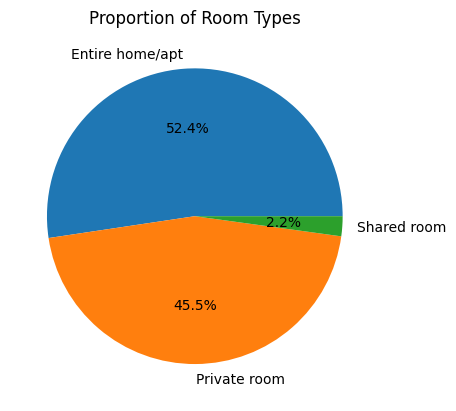

In [83]:
# EDA 5 - Proportion of Room Types
room_counts = df["room_type"].value_counts()

plt.figure()
plt.pie(room_counts, labels=room_counts.index, autopct="%1.1f%%")
plt.title("Proportion of Room Types")
plt.show()

Linear Regression

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("AB_NYC_2019_Cleaned.csv")

# Features and target
X = df.drop("price", axis=1)
X = X.select_dtypes(include=["int64", "float64"])
y = df["price"]

# Train-test split (same as professor)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluation
rmse_lr = mean_squared_error(y_test, preds) ** 0.5
mae_lr = mean_absolute_error(y_test, preds)
r2_lr = r2_score(y_test, preds)

rmse_lr, mae_lr, r2_lr


(209.81479591009088, 74.83739069984257, 0.03140643375676999)

Decision Tree

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("AB_NYC_2019_Cleaned.csv")

# Features and target
X = df.drop("price", axis=1)
X = X.select_dtypes(include=["int64", "float64"])
y = df["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = DecisionTreeRegressor(
    max_depth=20,
    min_samples_leaf=50,
    random_state=42
)

# Fit & Predict
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluation
rmse_dt = mean_squared_error(y_test, preds) ** 0.5
mae_dt = mean_absolute_error(y_test, preds)
r2_dt = r2_score(y_test, preds)

rmse_dt, mae_dt, r2_dt


(207.66110354815072, 69.1768973297841, 0.051189082283625176)

Random Forest

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("AB_NYC_2019_Cleaned.csv")

# Features and target (SAME as before)
X = df.drop("price", axis=1)
X = X.select_dtypes(include=["int64", "float64"])
y = df["price"]

# Train-test split (SAME)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model (ONLY this line changes)
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_leaf=20,
    random_state=42
)

# Fit & Predict (SAME)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluation (SAME metrics)
rmse_rf = mean_squared_error(y_test, preds) ** 0.5
mae_rf = mean_absolute_error(y_test, preds)
r2_rf = r2_score(y_test, preds)

rmse_rf, mae_rf, r2_rf


(202.08062278499466, 64.20429022971847, 0.10149871727546178)